# Lecture 4: CT convolution clarification

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In class, we computed the convolution 

$$
x(t) * h(t) = \int_{-\infty}^{\infty} x(\tau) h(t - \tau) d\tau
$$

for the signal $x(t) = e^{-2t} u(t)$, and $h(t) = u(t - 1)$. I drew a picture that ended up being confusing, so here is a code example that better shows what I intended.

First, we define four functions.

In [2]:
def u(t):
    """Unit step"""
    if t > 0:
        return 1
    return 0

def h(t):
    """Impulse response"""
    return u(t - 1)

def x(t):
    """Our signal"""
    return np.exp(-2 * t) * u(t)

def y(t):
    """The answer we derived mathematically."""
    if t > 1:
        return 0.5 * (1 - np.exp(-2 * (t - 1)))
    return 0

These functions are plotted below.

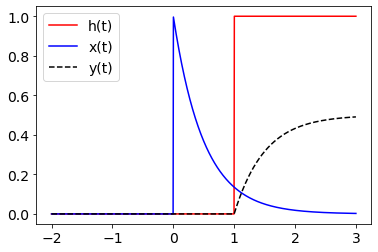

In [3]:
t_range = np.linspace(-2, 3, 1000)

plt.plot(t_range, [h(t) for t in t_range], c="red", label="h(t)")
plt.plot(t_range, [x(t) for t in t_range], c="blue", label="x(t)")
plt.plot(t_range, [y(t) for t in t_range], c="black", linestyle='--', label="y(t)")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

What I was trying to get at in class was visualizing a very discretized version of the convolution, where at each time, the value of $x(\tau)$ yields a copy of $h(t - \tau)$, i.e., a scaled and shifted version of the impulse response.

To show this in code, let's imagine discretizing the convolution integral (much like we did in lecture 3) into a bunch of tiny time steps of size $\Delta$:

$$
x(t) * h(t) = \int_{-\infty}^{\infty} x(\tau) h(t - \tau) d\tau \approx \sum_{k=-\infty}^{\infty} x(k\Delta) h(t - k\Delta) \Delta
$$

We can now visualize this as a superposition of signals using the code below:

In [4]:
Δ = 0.01
k_range = np.arange(0, 500) # Start at 0 because x(t) does not exist below 0

component_signals = np.array([[x(k * Δ) * h(t - k * Δ) * Δ for t in t_range] for k in k_range])

Let's plot a subset of these individually for each $k$:

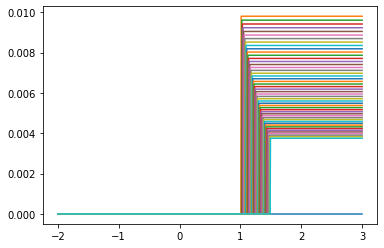

In [5]:
for idx in range(50):
    plt.plot(t_range, component_signals[idx])

We can now sum up over $k$, and plot the full convolution. We find it matches with the plot of $y(t)$ above.

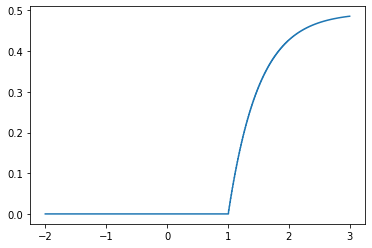

In [6]:
plt.plot(t_range, np.sum(component_signals, axis=0))

Note that we could also achieve the same thing by considering the opposite order in the convolution sum:

$$
h(t) * x(t) \approx \sum_{k=-\infty}^{\infty} x(t - k\Delta) h(k\Delta) \Delta
$$

In [7]:
# We must start at k = 1 / Δ here, because h(t) doesn't exist below 1
k_range = np.arange(1 / Δ, 1 / Δ + 500) 

component_signals_v2 = np.array([[x(t - k * Δ) * h(k * Δ) * Δ for t in t_range] for k in k_range])

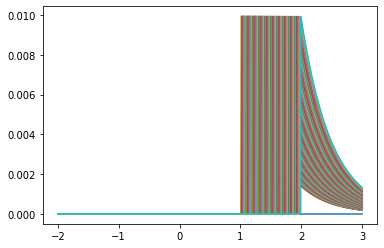

In [8]:
for idx in range(100):
    plt.plot(t_range, component_signals_v2[idx])

Again, we can plot the sum

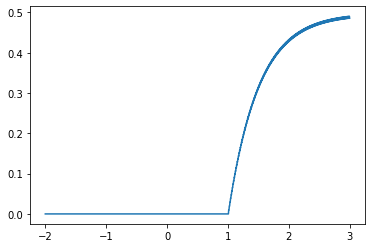

In [9]:
plt.plot(t_range, np.sum(component_signals_v2, axis=0))

It takes a little more finessing to get it to converge because of how it is discretized, but you can see that it yields the same result.